In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Paired')
import warnings
warnings.filterwarnings('ignore')

## Getting Stock Data with Yahoo Finance (Old way)

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

ImmediateDeprecationError: 
Yahoo Daily has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


## Updated (4/14/18): Getting Stock Data with Google Finance
Yahoo finance has changed the structure of its website and as a result the most popular Python packages for retrieving data have stopped functioning properly. Until this is resolved, the following piece of code will provide sufficient data to run the examples in this series of articles. Data is now taken from Google Finance and we are using the ETF "SPY" as proxy for S&P 500 on Google Finance.

Please not that if you use this set of data to run the example, you may be getting slightly different results.

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'SPY']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# Use pandas_reader.data.DataReader to load the desired data. As simple as that.
data = data.DataReader(tickers, 'morningstar', start_date, end_date)

In [3]:
data.head(9)

Close     High      Low     Open     Volume
Symbol Date                                                     
AAPL   2010-01-01  30.1046  30.4786  30.0800  30.4443          0
       2010-01-04  30.5729  30.6429  30.3400  30.5000  123432050
       2010-01-05  30.6257  30.7986  30.4643  30.6843  150476004
       2010-01-06  30.1386  30.7471  30.1071  30.6257  138039594
       2010-01-07  30.0829  30.2857  29.8643  30.2400  119282324
       2010-01-08  30.2829  30.2857  29.8657  30.0571  111969081
       2010-01-11  30.0157  30.4286  29.7786  30.4243  115557365
       2010-01-12  29.6743  29.9671  29.4886  29.9029  148614774
       2010-01-13  30.0929  30.1329  29.1571  29.7314  151472335

In [17]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

close.head(10)

ValueError: cannot include dtype 'M' in a buffer

In [35]:
all_weekdays

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=1826, freq='B')

In [36]:
close.describe()

,AAPL,MSFT,SPY
count,1825.000000,1825.000000,1825.000000
mean,79.413167,37.118405,164.674986
std,28.302440,10.814263,37.049846
min,27.440000,23.010000,102.200000
25%,55.460000,27.840000,131.280000
50%,78.440000,33.030000,165.220000
75%,103.120000,46.110000,201.990000
max,133.000000,63.620000,227.760000


In [23]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

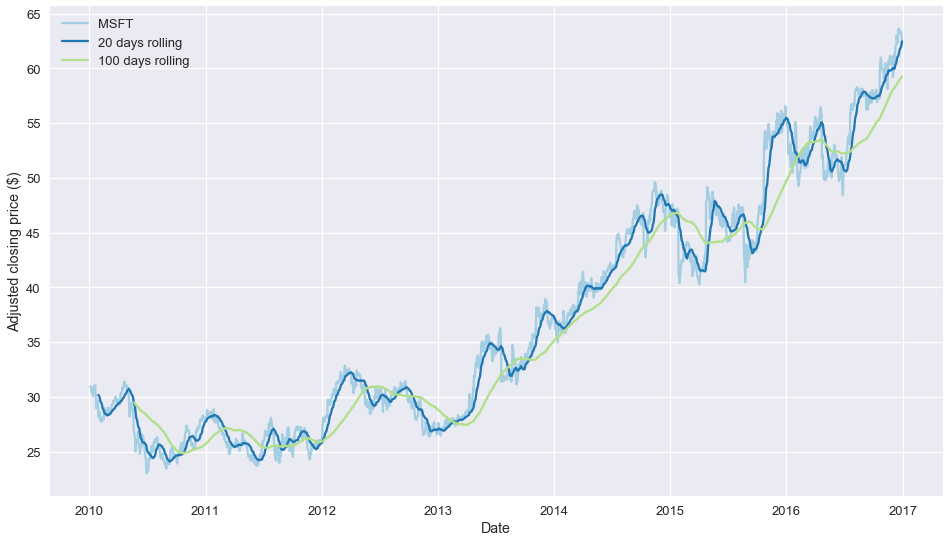

In [77]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
sns.despine()